In [ ]:
tranforms
color_aug = transforms.RandomColorJitter(
                               brightness=0.5,
                               contrast=0.5,
                               saturation=0.5,
                               hue=0.5)
apply(example_image, color_aug)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        channel_shift_range=130.0,
        brightness_range=(0.4, 0.8))

image_dir = 'Images/Images'
for image_file in image_dir:
  img = load_img(os.path.join(image_dir, image_file))
  x = img_to_array(img)  
  x = x.reshape((1,) + x.shape) 

  i = 0
  for batch in datagen.flow(x, batch_size=1, save_to_dir='images_final', save_prefix= image_file, save_format='jpeg'):
      i += 1
      if i > 3:
          break 

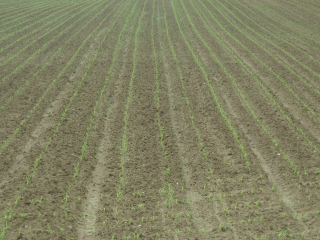

In [ ]:
img = load_img('/content/drive/MyDrive/Deep Learning/detecting-crop-rows-from-image-data/Images/Images/crop_row_003.jpg')
img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip 'detecting-crop-rows-from-image-data.zip' -d '/content/drive/MyDrive/Deep Learning/detecting-crop-rows-from-image-data'

In [ ]:
import numpy as np
import cv2
import os

# os.mkdir('/content/drive/MyDrive/Deep Learning/detecting-crop-rows-from-image-data/train_labels/train_label_images')

dir_path = '/content/drive/MyDrive/Deep Learning/detecting-crop-rows-from-image-data/train_labels/train_labels'
image_dir_path = '/content/drive/MyDrive/Deep Learning/detecting-crop-rows-from-image-data/train_labels/train_label_images'
for file in os.listdir(dir_path):
  # print(os.path.join(dir_path, file))
  filename = os.path.splitext(file)[0]
  img_array = np.load(os.path.join(dir_path, file))
  cv2.imwrite(os.path.join(image_dir_path, filename + '.JPG'), img_array)


In [ ]:
import tensorflow as tf
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import time
import glob 
import random

import numpy as np
import cv2
import os

In [ ]:
import pandas as pd

ids = pd.read_csv('/content/drive/MyDrive/Deep Learning/detecting-crop-rows-from-image-data/train and test ids.csv')
input_path = '/content/drive/MyDrive/Deep Learning/detecting-crop-rows-from-image-data/Images/Images'
train_output_path = '/content/drive/MyDrive/Deep Learning/detecting-crop-rows-from-image-data/train_labels/train_labels'
img_list_X_train = []
img_list_X_test = []
npy_list_y_train = []
for i in ids['train_ids']:
  img_list_X_train.append(os.path.join(input_path,'crop_row_' + str(i).zfill(3) + '.jpg'))

for i in ids['test_ids']:
  if not np.isnan(i):
    img_list_X_test.append(os.path.join(input_path,'crop_row_' + str(int(i)).zfill(3) + '.jpg'))

for i in ids['train_ids']:
  npy_list_y_train.append(os.path.join(train_output_path,'crop_row_' + str(i).zfill(3) + '.npy'))

In [ ]:
sample_img = imread(img_list_X_train[0])
img_height = sample_img.shape[0]
img_width = sample_img.shape[1]
img_channels = sample_img.shape[2]
number_of_init_filters = 16

# img_height = 240
# img_width = 240
# img_channels = 3

In [ ]:
# new version of dataset
X_train = np.zeros((len(img_list_X_train), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_train):
  img_train = imread(img_path)
  X_train[i] = img_train

X_test = np.zeros((len(img_list_X_test), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_test):
    img_test = imread(img_path)
    X_test[i] = img_test

y_train = np.zeros((len(npy_list_y_train), img_height, img_width, 1), dtype = np.bool)
for i, npy_path in enumerate(npy_list_y_train):
    npy_test = np.load(npy_path)
    red_img = npy_test[:, :, 0]
    red_img = np.expand_dims(red_img, axis=2)
    y_train[i] = red_img

<ipython-input-70-c9e168db0585>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.zeros((len(npy_list_y_train), img_height, img_width, 1), dtype = np.bool)


In [ ]:
#old version of datasets
X_train = np.zeros((len(img_list_X_train), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_train):
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_train[i] = img_train

X_test = np.zeros((len(img_list_X_test), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_test):
    img_test = imread(img_path)
    img_test = resize(img_test, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_test[i] = img_test

train_output_path = '/content/drive/MyDrive/Deep Learning/detecting-crop-rows-from-image-data//train_labels/train_label_images'
img_list_y_train = []
for i in ids['train_ids']:
  img_list_y_train.append(os.path.join(train_output_path,'crop_row_' + str(i).zfill(3) + '.JPG'))
y_train = np.zeros((len(img_list_y_train), img_height, img_width, 1), dtype=bool)

for i, img_path in enumerate(img_list_y_train):
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, 1), mode='constant', preserve_range='True')
    y_train[i] = img_train

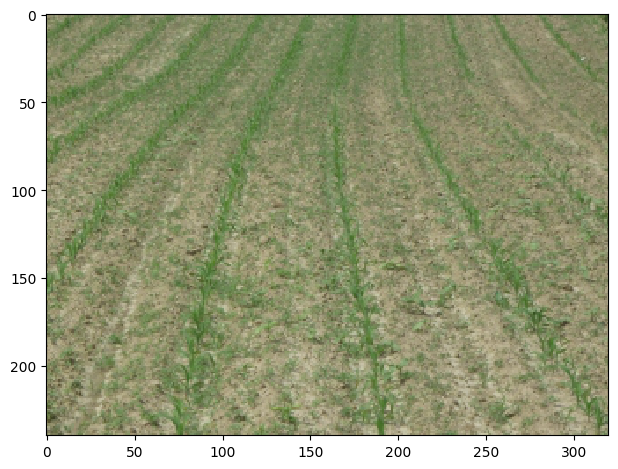

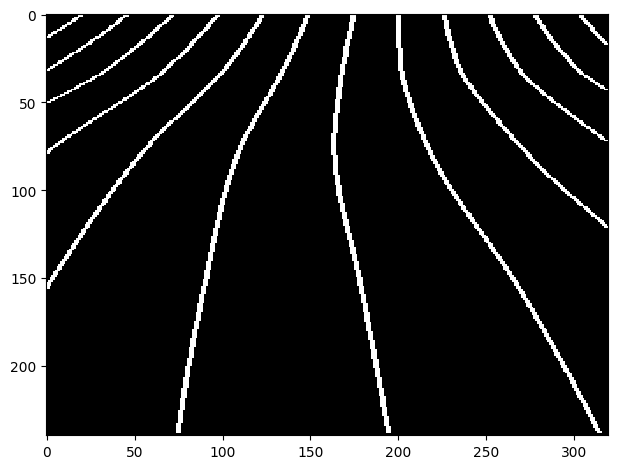

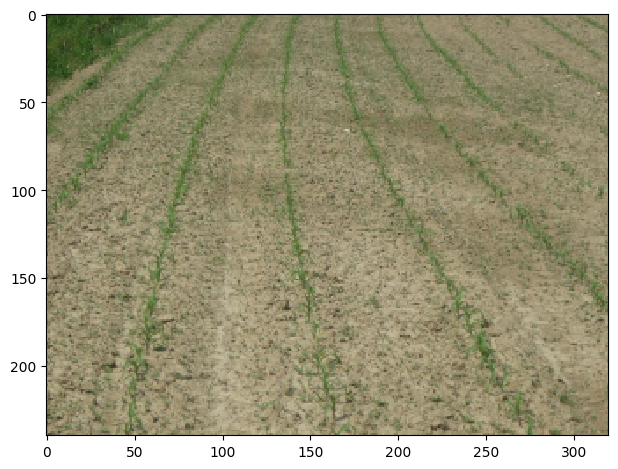

In [ ]:
#plota uma amostra
ix = random.randint(0, len(img_list_X_train))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(X_test[random.randint(0, len(img_list_X_test)-1)]))
plt.show()

In [ ]:
inputs = tf.keras.layers.Input(shape=(img_height, img_width, img_channels), name="input_image")
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#Contractional path
cv1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(s)
cv2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(cv1)

#DS1
#fire module 1.1 
f1_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(cv2)
f1_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1 = tf.keras.layers.concatenate([f1_1l,f1_1r])

#fire module 1.2
f1_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2 = tf.keras.layers.concatenate([f1_2l,f1_2r])
f1_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1', padding="same")(f1_2)

#DS2
#fire module 2.1 
f2_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f2_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1 = tf.keras.layers.concatenate([f2_1l,f2_1r])

#fire module 2.2
f2_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2 = tf.keras.layers.concatenate([f2_2l,f2_2r])
f2_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool2', padding="same")(f2_2)


#DS3
#fire module 3.1 
f3_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f3_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1 = tf.keras.layers.concatenate([f3_1l,f3_1r])

#fire module 3.2
f3_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2 = tf.keras.layers.concatenate([f3_2l,f3_2r])
f3_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3', padding="same")(f3_2)

#DS4
#fire module 4.1 
f4_1 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f4_1l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1 = tf.keras.layers.concatenate([f4_1l,f4_1r])

#fire module 4.2
f4_2 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_2l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2 = tf.keras.layers.concatenate([f4_2l,f4_2r])
f4_2 = tf.keras.layers.Dropout(0.5)(f4_2)


#US1
#Transposed fire module
tf1_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*5, (1,1), strides=(1,1), padding='same', activation='relu')(f4_2)
tf1_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (1,1), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (2,2), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1 = tf.keras.layers.concatenate([tf1_1l,tf1_1r])
tf1_1 = tf.keras.layers.concatenate([tf1_1,f3_2])

#fire module 5.1 
f5_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf1_1)
f5_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1 = tf.keras.layers.concatenate([f5_1l,f5_1r])

#fire module 5.2
f5_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2 = tf.keras.layers.concatenate([f5_2l,f5_2r])


#US2
#Transposed fire module
tf2_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(2,2), padding='same', activation='relu')(f5_2)
tf2_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (1,1), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (2,2), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1 = tf.keras.layers.concatenate([tf2_1l,tf2_1r])
tf2_1 = tf.keras.layers.concatenate([tf2_1,f2_2])

#fire module 6.1 
f6_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf2_1)
f6_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1 = tf.keras.layers.concatenate([f6_1l,f6_1r])

#fire module 6.2
f6_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2 = tf.keras.layers.concatenate([f6_2l,f6_2r])


#US3
#Transposed fire module
tf3_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*3, (1,1), strides=(2,2), padding='same', activation='relu')(f6_2)
tf3_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1 = tf.keras.layers.concatenate([tf3_1l,tf3_1r])
tf3_1 = tf.keras.layers.concatenate([tf3_1,f1_2])

#fire module 6.1 
f7_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf3_1)
f7_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1 = tf.keras.layers.concatenate([f7_1l,f7_1r])

#fire module 6.2
f7_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2 = tf.keras.layers.concatenate([f7_2l,f7_2r])

t9 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(2,2), padding='same', activation='relu')(f7_2)
c1 = tf.keras.layers.concatenate([t9,cv2])
cv3 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
cv4 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(cv3)


outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(cv4)


model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 240, 320, 3)  0           ['input_image[0][0]']            
                                                                                                  
 conv2d_94 (Conv2D)             (None, 240, 320, 64  1792        ['lambda_2[0][0]']               
                                )                                                                 
                                                                                            

In [ ]:
#Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

name = "SqueezeUnet-{}".format(int(time.time()))
callbacks = [ 
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.TensorBoard(log_dir='tensorboard/{}'.format(name))]

results = model.fit(X_train, y_train, validation_split=0.1, batch_size=4, epochs=20, callbacks=callbacks)

model.save("SqueezeUnet.h5")

Epoch 1/20
48/48 [==============================] - 35s 278ms/step - loss: 0.2476 - accuracy: 0.9332 - val_loss: 0.2249 - val_accuracy: 0.9347
Epoch 2/20
48/48 [==============================] - 13s 261ms/step - loss: 0.2272 - accuracy: 0.9334 - val_loss: 0.2371 - val_accuracy: 0.9347
Epoch 3/20
48/48 [==============================] - 13s 262ms/step - loss: 0.2239 - accuracy: 0.9334 - val_loss: 0.2133 - val_accuracy: 0.9347
Epoch 4/20
48/48 [==============================] - 13s 266ms/step - loss: 0.2238 - accuracy: 0.9334 - val_loss: 0.2117 - val_accuracy: 0.9347
Epoch 5/20
48/48 [==============================] - 13s 271ms/step - loss: 0.2141 - accuracy: 0.9334 - val_loss: 0.2109 - val_accuracy: 0.9347
Epoch 6/20
48/48 [==============================] - 13s 268ms/step - loss: 0.2093 - accuracy: 0.9334 - val_loss: 0.2064 - val_accuracy: 0.9347
Epoch 7/20
48/48 [==============================] - 13s 267ms/step - loss: 0.2042 - accuracy: 0.9333 - val_loss: 0.1857 - val_accuracy: 0.9347

In [ ]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

3/3 [==============================] - 1s 515ms/step


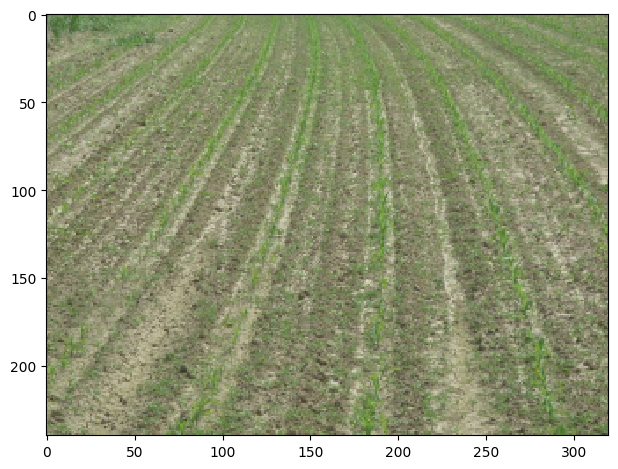

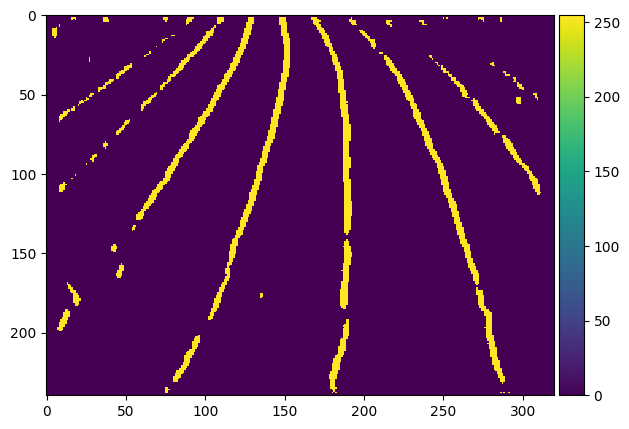

In [ ]:
preds_train_t = (preds_train >0.25).astype(np.uint8)
preds_val_t = (preds_val >0.25).astype(np.uint8)
preds_test_t = (preds_test >0.25).astype(np.int32) * 255

idx = random.randint(0, len(preds_test_t)-1)
imshow(X_test[idx])
plt.show()
imshow(preds_test_t[idx])
plt.show()
# imshow(y_test[idx])
# plt.show()
# imshow(y_test_compare[idx])
# plt.show()

In [ ]:
def encode_mask_to_rle(mask):
    '''
    mask: numpy array binary mask 
    255 - mask 
    0 - background
    Returns encoded run length 
    '''
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    
    return ' '.join(str(x) for x in runs)


def decode_rle_to_mask(rle, height = 240, width = 320):
    '''
    rle : run-length as string formated (start value, count)
    height : height of the mask 
    width : width of the mask
    returns binary mask
    '''
    rle = np.array(rle.split(' ')).reshape(-1, 2)
    mask = np.zeros((height*width))
    color = 255
    for i in rle:
        mask[int(i[0]):int(i[0])+int(i[1])] = color

    return mask.reshape(height, width)

In [ ]:
rles = []

for i in range(preds_test_t.shape[0]):
    # id = img_list_X_test[i][16:19]
    rle = encode_mask_to_rle(preds_test_t[i])
    rles.append(rle)
    
df = pd.DataFrame({'ids': [img_list_X_test[i][96:99]  for i in range(preds_test_t.shape[0])], 'labels': rles})

In [ ]:
df.to_csv('Niharika_Nallajarla_3.csv', index=False)

In [ ]:
img_list_X_test[0][96:99]

'162'

In [ ]:
df

,ids,labels
0,162,319 1 323 316 641 1919 2561 319 2881 318 3201 ...
1,019,1 18 211 12 262 9 274 8 285 12 298 9 312 5 320...
2,075,1 4 42 2 50 3 55 12 99 1 115 2 166 1 244 1 250...
3,244,323 41 365 1 367 1 369 1 371 21 393 5 399 1 40...
4,101,127 1 163 1 190 2 221 1 251 4 290 2 322 138 46...
...,...,...
66,069,1 1 10 5 26 45 127 1 145 1 161 3 177 1 191 3 2...
67,018,142 6 269 2 318 2 321 4160 4482 319 4802 143 4...
68,257,52 2 78 4 130 3 155 3 177 3 203 1 228 1 322 56...
69,134,1 1 4 21 26 3 36 1 42 3 46 13 90 8 246 62 310 ...
